In [1]:
# Import necessary libraries
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

# Set team-specific information
player = 'Jude-Bellingham'
player_id = '57d88cf9'
url = "https://fbref.com/en/players/"+player_id+"/scout/365_m1/"+player+"-Scouting-Report"

# Read HTML table from the specified URL, set multi-index, and save as a CSV file
df = pd.read_html(url, index_col=[0, 1])[1]
df.columns = df.columns.droplevel(0)
df = df.to_csv('percentiletemp.csv')

# Pause execution to ensure the CSV file is written before reading
time.sleep(3)

# Read the CSV file and rename columns for clarity
df = pd.read_csv('percentiletemp.csv')
df.rename(columns={df.columns[0]: 'Metric', df.columns[1]: 'p90'}, inplace=True)
df = df.dropna(subset=['Metric'])
df

,Metric,p90,Percentile
0,Non-Penalty Goals,0.59,99.0
1,npxG: Non-Penalty xG,0.37,94.0
2,Shots Total,2.51,71.0
3,Assists,0.19,57.0
4,xAG: Expected Assisted Goals,0.17,42.0
5,npxG + xAG,0.54,78.0
6,Shot-Creating Actions,4.53,75.0
8,Passes Attempted,55.15,93.0
9,Pass Completion %,84.7%,98.0
10,Progressive Passes,7.70,99.0


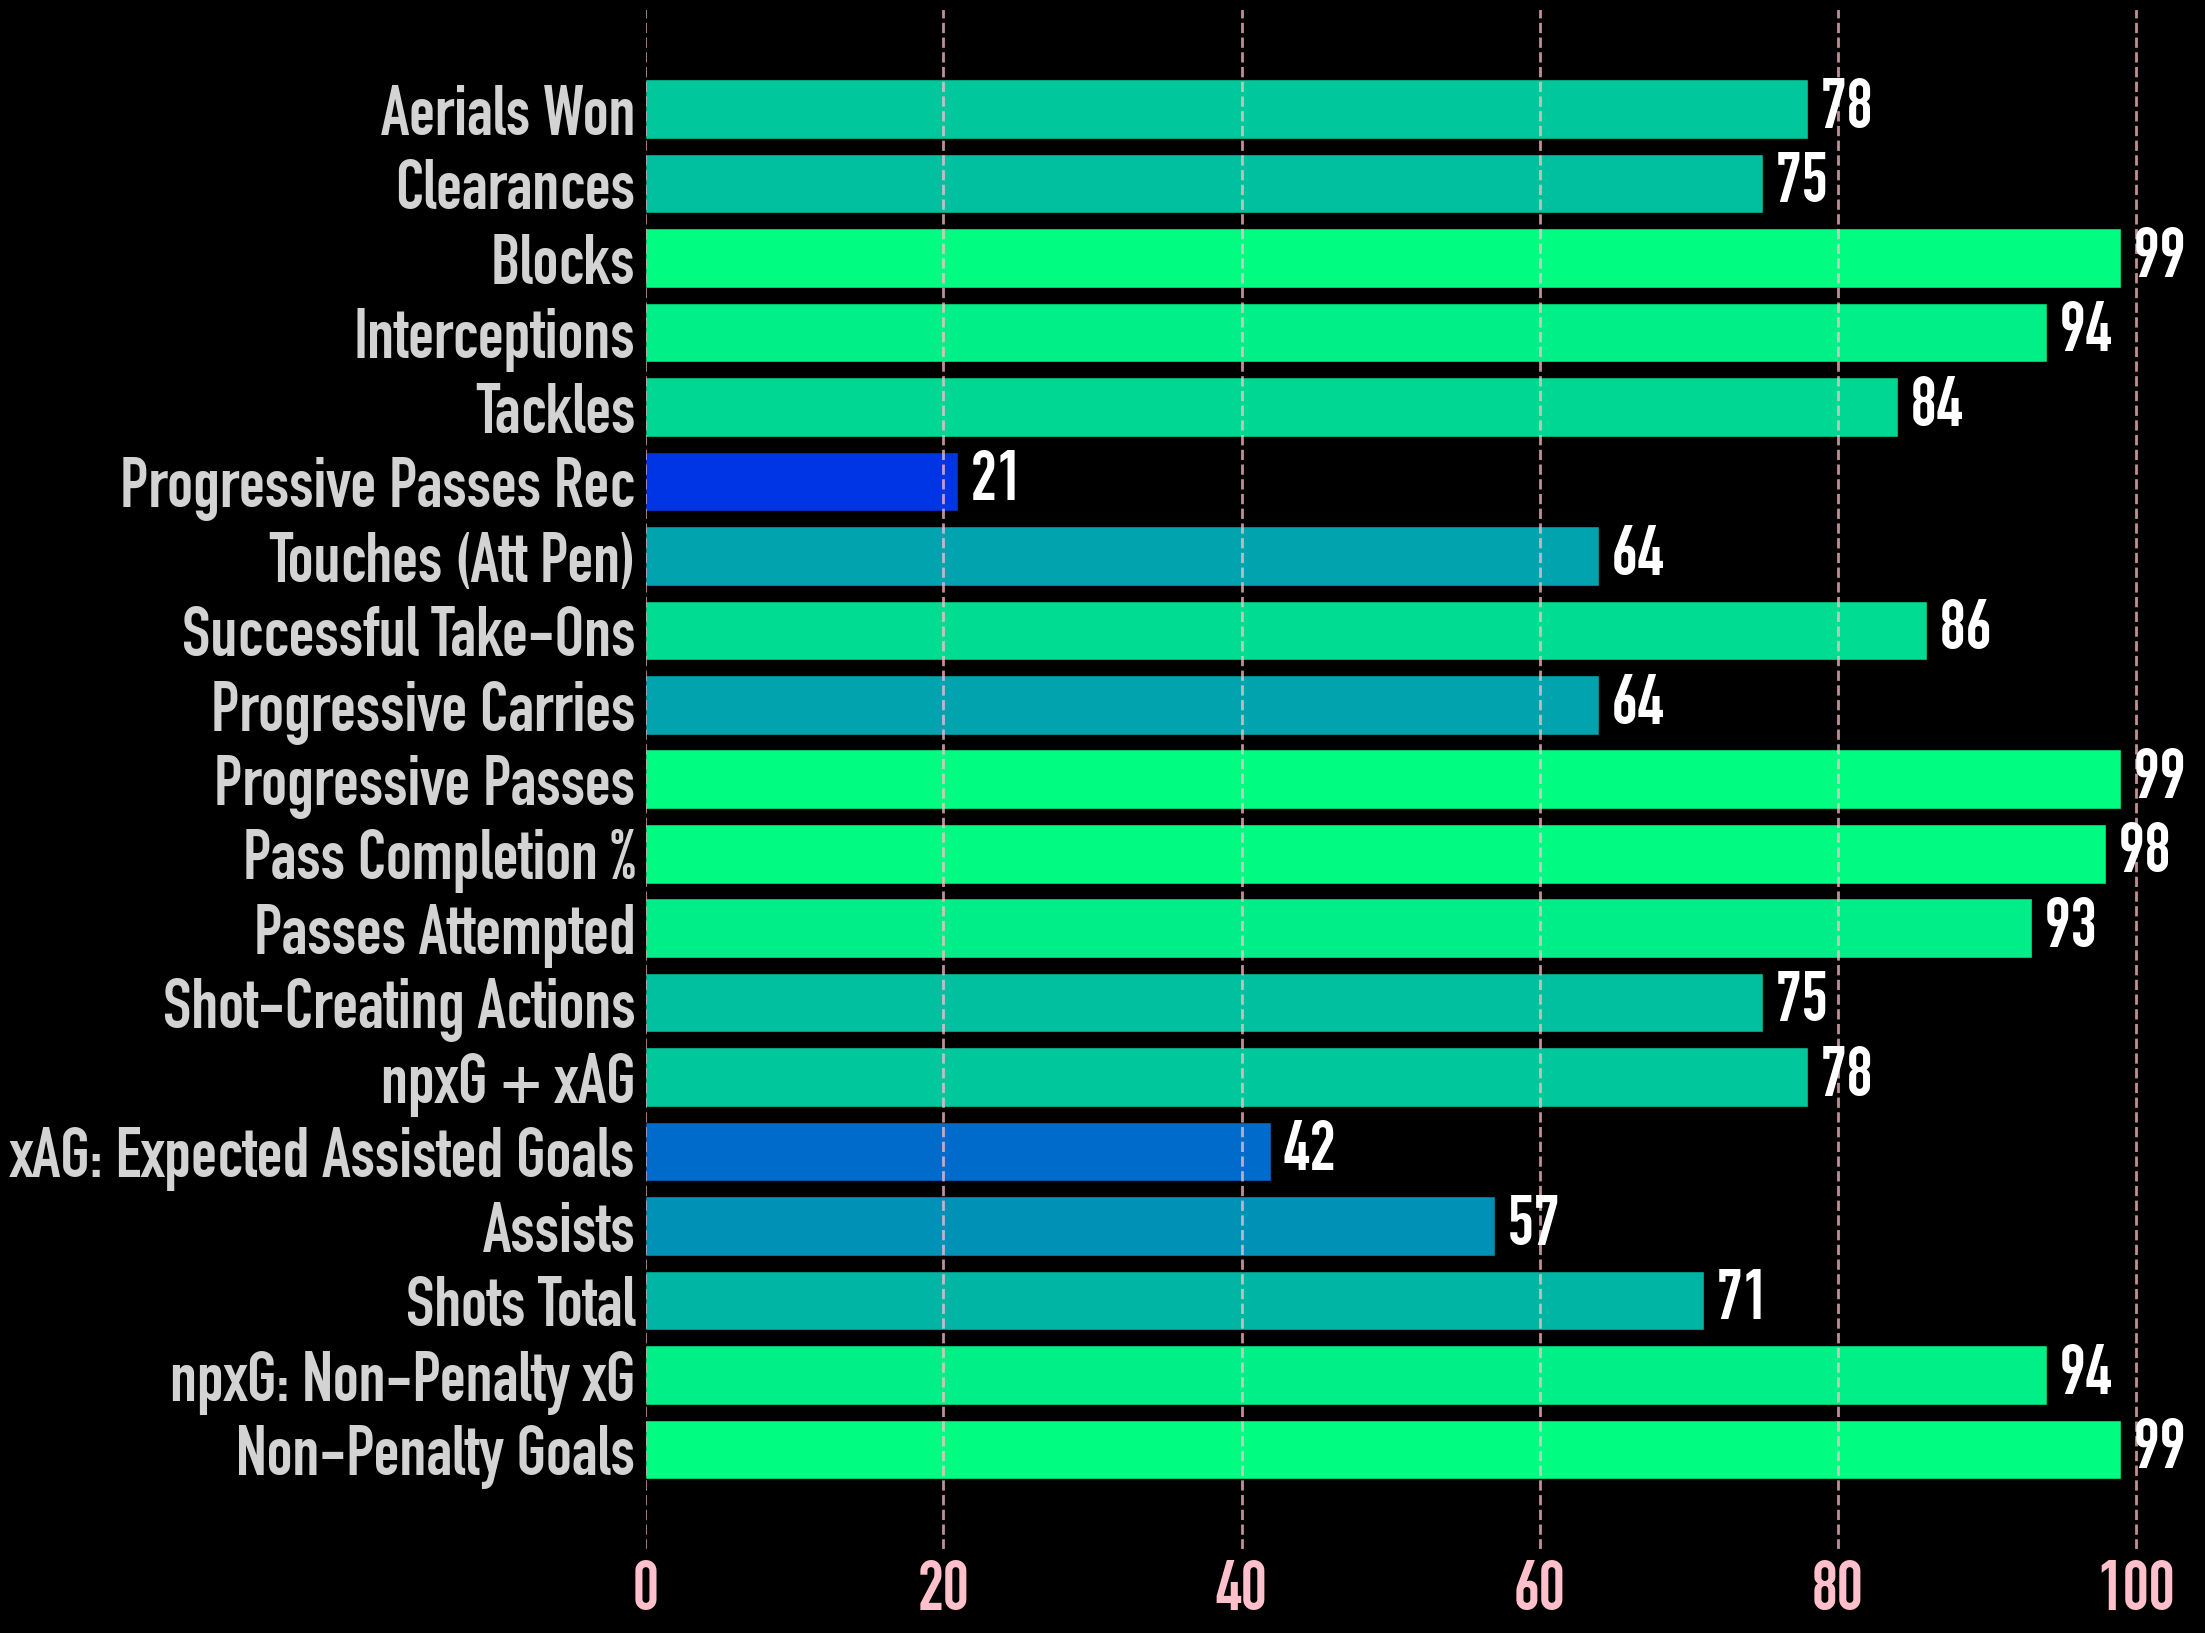

In [3]:
# Set font size for chart annotations
font_size = 50

# Set font properties for chart annotations
font_path = "DIN-Condensed-Bold.ttf"  # Replace with the actual path to DIN Condensed Bold font
prop = fm.FontProperties(fname=font_path)

# Create a horizontal bar chart with style modifications
fig, ax_chart = plt.subplots(figsize=(20, 20))

# Create bars with only filled sections based on percentile value
bars = ax_chart.barh(df['Metric'], df['Percentile'], color=plt.cm.winter(df['Percentile'] / 100), edgecolor='black')

# Set background color for the figure and chart
fig.set_facecolor('black')
ax_chart.set_facecolor('black')

# Set font size and font for x and y ticks
plt.xticks(font='DIN Condensed', color='pink')
plt.yticks(font='DIN Condensed', color='lightgrey')

# Display the values on the bars with violet color (no decimal points)
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f' {int(bar.get_width()):d}', va='center', fontsize=50, color='w', fontproperties=prop)

# Customize chart appearance with grid lines, colors, and tick sizes
ax_chart.xaxis.grid(True, linewidth=2, linestyle='--', color='pink', alpha=0.75)
ax_chart.xaxis.set_tick_params(labelsize=font_size)
ax_chart.yaxis.set_tick_params(labelsize=font_size)

# Save the chart as a PNG file in the 'Output' directory
plt.savefig(player + '-Percentile.png', bbox_inches='tight')